In [1]:
%%capture
!pip install git+https://github.com/huggingface/datasets.git
!pip install git+https://github.com/huggingface/transformers.git
!pip install soundfile
!pip install jiwer

In [2]:
from datasets import load_dataset, load_metric

from datasets import ClassLabel
import random
import pandas as pd
from IPython.display import display, HTML

In [3]:
from transformers import Wav2Vec2CTCTokenizer

# load vocab from json
import json
dictionary = json.load(open("./wav2vec2-large-english-phoneme-v2/vocab.json"))

tokenizer = Wav2Vec2CTCTokenizer("./wav2vec2-large-english-phoneme-v2/vocab.json", unk_token="[UNK]", pad_token="[PAD]", word_delimiter_token="|")




In [4]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor(feature_size=1, sampling_rate=16000, padding_value=0.0, do_normalize=True, return_attention_mask=False)

from transformers import Wav2Vec2Processor

processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

In [5]:
processor = Wav2Vec2Processor.from_pretrained("./wav2vec2-large-english-phoneme-v2")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [6]:
from transformers import Wav2Vec2ForCTC
model = Wav2Vec2ForCTC.from_pretrained("./wav2vec2-large-english-phoneme-v2")

In [7]:
# Convert test file to correct format (16khz mono wav 16-bit)

import os
test_path = "./assessment_9.mp3"
root, extension = os.path.splitext(test_path)

# Create the output file name with the ".wav" extension
output_path = f"{root}.wav"

os.system(f'ffmpeg -y -i {test_path} -acodec pcm_s16le -ac 1 -ar 16000 {output_path}')

test_path = output_path

In [9]:
import soundfile as sf

waveform, sample_rate = sf.read(test_path)

In [28]:
import torch

model.to("cpu")
input_values = processor(waveform, sampling_rate=sample_rate, return_tensors="pt").input_values.to("cpu")

with torch.no_grad():
  emissions = model(input_values).logits

pred_ids = torch.argmax(emissions, dim=-1)
pred_str = processor.batch_decode(pred_ids)[0]
print(pred_str)
# convert ids to tokens
" ".join(processor.tokenizer.convert_ids_to_tokens(pred_ids[0].tolist()))

bət ˈæftər ɔl ðət kəˈmoʊʃən wɑz ɪt ɔl wərθ waɪlˈæbsəluntli jɛsə sɛt dɪˈzaɪn wɑz ˈbrəθˈteɪkɪŋ ðə ˈæktərz wər ɪnˈkrɛtəbəl ənd ðə soʊmz wər ˈmɛmərəbəl


'[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] b ə ə t | | ˈ ˈ [PAD] æ [PAD] f f t t t ə ə r r r | | | [PAD] [PAD] [PAD] ɔ ɔ ɔ l l l l l l | | | ð ð [PAD] ə [PAD] [PAD] [PAD] t | | [PAD] k [PAD] ə ə ˈ ˈ m m [PAD] o o ʊ ʊ [PAD] [PAD] [PAD] ʃ ʃ [PAD] [PAD] ə ə n n [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] | | | [PAD] [PAD] w w w ɑ ɑ [PAD] z z z | ɪ ɪ t | | [PAD] ɔ ɔ ɔ l l l l | | | [PAD] w w [PAD] ə ə r r [PAD] [PAD] θ θ | | | [PAD] w w w a a a a ɪ ɪ ɪ [PAD] l l l [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

In [29]:
# emissions = torch.log_softmax(emissions, dim=-1)
emission = emissions[0].cpu().detach()
emission.shape

torch.Size([693, 45])

{"'": 30, '[PAD]': 44, '[UNK]': 43, 'a': 10, 'b': 19, 'c': 15, 'd': 1, 'e': 27, 'f': 3, 'g': 35, 'h': 31, 'i': 25, 'j': 5, 'k': 32, 'l': 7, 'm': 33, 'n': 13, 'o': 42, 'p': 9, 'q': 20, 'r': 26, 's': 21, 't': 16, 'u': 36, 'v': 2, 'w': 14, 'x': 28, 'y': 39, 'z': 18, '|': 24, 'æ': 41, 'ð': 29, 'ŋ': 23, 'ɑ': 8, 'ɔ': 38, 'ə': 0, 'ɛ': 4, 'ɪ': 22, 'ʃ': 34, 'ʊ': 12, 'ʒ': 6, 'ʤ': 17, 'ʧ': 11, 'ˈ': 37, 'θ': 40}


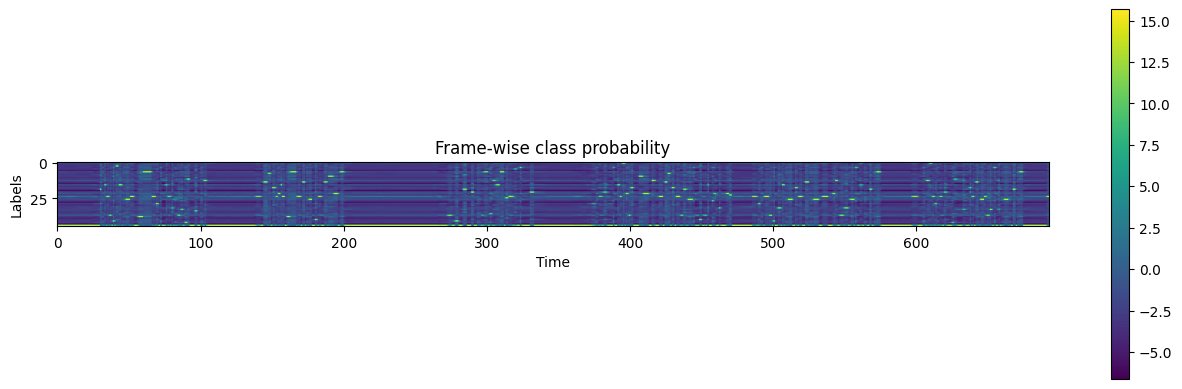

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]
import matplotlib.pyplot as plt
print(dictionary)
plt.imshow(emission.T)
plt.colorbar()
plt.title("Frame-wise class probability")
plt.xlabel("Time")
plt.ylabel("Labels")
plt.show()

In [31]:
# These pretrained model uses some kind of modified ipa. Let's map it to the CMU standard 39 phonemes

# bət ˈæftər ɔl ðət kəˈmoʊʃən wɑz ɪt ɔl wərθ waɪlˈæbsəluntli jɛsə sɛt dɪˈzaɪn wɑz ˈbrəθˈteɪkɪŋ ðə ˈæktərz wər ɪnˈkrɛtəbəl ənd ðə soʊmz wər ˈmɛmərəbəl # pretrained wav2vec2, seems to map ER and UH to ə
# bət æftər ɔl ðət kəmoʊʃən wɑz ɪt ɔl wərθwaɪl æbsəlutli yɛs ðə sɛt dɪzaɪn wɑz brɛθtekɪŋ ðə æktərz wər ɪnkrɛdəbəl ænd ðə sɔŋz wər mɛmərəbəl # transcription
# bʌt æftɝ ɔl ðʌt kʌmoʃʌn wɑz ɪt ɔl wɝθwYl æbsʌlutli jɛs ði sɛt dɪzYn wɑz bɹɛθtekɪŋ ði æktɝz wɝ ɪnkɹɛdʌbʌl ænd ði sɔŋz wɝ mɛmɝʌbʌl # cmu
# bʌt ˈæftər ɔl ðæt kəˈmoʊʃən, wʌz ɪt ɔl ˈwɜrˈθwaɪl? ˌæbsəˈlutli jɛs! ðə sɛt dɪˈzaɪn wʌz ˈbrɛθˌteɪkɪŋ, ði ˈæktərz wɜr ɪnˈkrɛdəbəl, ænd ðə sɔŋz wɜr ˈmɛmərəbəl. # online
# But after all that commotion, was it all worthwhile? Absolutely yes! The set design was breathtaking, the actors were incredible, and the songs were memorable.

sphinx_to_ipa = {
  "'": "'",
  "[PAD]": "[PAD]",
  "[UNK]": "[UNK]",
  "AY": "aɪ",
  "B": "b",
  "C": "c",
  "D": "d",
  "EY": "e",
  "F": "f",
  "G": "g",
  "HH": "h",
  "IY": "i",
  "ZH": "ʒ",
  "K": "k",
  "L": "l",
  "M": "m",
  "N": "n",
  "AW": "o",
  "OW": "oʊ",
  "P": "p",
  "Q": "q",
  "R": "r",
  "S": "s",
  "T": "t",
  "UW": "u",
  "V": "v",
  "W": "w",
  "28": "x",
  "Y": "y",
  "Z": "z",
  "|": "|",
  "AE": "æ",
  "DH": "ð",
  "NG": "ŋ",
  "AA": "ɑ",
  "AO": "ɔ",
  "AH": "ə",
  "EH": "ɛ",
  "IH": "ɪ",
  "SH": "ʃ",
  "UH": "ʊ",
  "JH": "ʤ",
  "CH": "ʧ",
  "'": "ˈ",
  "TH": "θ",
  "ER": "ər", # pretrained model has no ɝ
  "OY": "ɔɪ"
}

In [32]:
from torchaudio.datasets import CMUDict
import re

CMU = CMUDict(root='./', download=True)

CMU_dict = {}
for word in CMU:
	if word[0] == 'THE':
		CMU_dict['the'] = 'ðə' # Choose the other pronunciation of "the" to generate the correct IPA transcript for this example
	else:
		CMU_dict[word[0].lower()] = [sphinx_to_ipa[re.sub(r'\d', '', phoneme.upper())] for phoneme in word[1]] # strip out stress markers

print(CMU_dict['hello'])

['h', 'ɛ', 'l', 'oʊ']


In [33]:
import string
transcript_roman = "But after all that commotion, was it all worthwhile? Absolutely yes! The set design was breathtaking, the actors were incredible, and the songs were memorable."
transcript_cleaned = [''.join(char.lower() for char in word if char not in string.punctuation) for word in transcript_roman.split()] # strip punctuation

transcript = [] # transcript in modified IPA
for word in transcript_cleaned:
  transcript += CMU_dict[word]
  transcript += [' ']

transcript = ''.join(transcript)
print(transcript)

bət æftər ɔl ðət kəmoʊʃən wɑz ɪt ɔl wərθwaɪl æbsəlutli yɛs ðə sɛt dɪzaɪn wɑz brɛθtekɪŋ ðə æktərz wər ɪnkrɛdəbəl ænd ðə sɔŋz wər mɛmərəbəl 


In [34]:
import json
# load vocab from json
with open("./wav2vec2-large-english-phoneme-v2/vocab.json", 'r', encoding='utf-8') as file:
    dictionary = json.load(file)

In [35]:
def format_transcript(transcript):
    import string
    translator = str.maketrans('', '', string.punctuation)
    cleaned_string = transcript.translate(translator)
    words = cleaned_string.split()
    # Join words with '|'
    result_string = '|'.join(word for word in words)
    return result_string

transcript = format_transcript(transcript)
print(f"Transcript: {transcript}")

tokens = [dictionary[c] for c in transcript]
print(list(zip(transcript, tokens)))


def get_trellis(emission, tokens, blank_id=0):
    num_frame = emission.size(0)
    num_tokens = len(tokens)

    # Trellis has extra diemsions for both time axis and tokens.
    # The extra dim for tokens represents <SoS> (start-of-sentence)
    # The extra dim for time axis is for simplification of the code.
    trellis = torch.empty((num_frame + 1, num_tokens + 1))
    trellis[0, 0] = 0
    trellis[1:, 0] = torch.cumsum(emission[:, 0], 0)
    trellis[0, -num_tokens:] = -float("inf")
    trellis[-num_tokens:, 0] = float("inf")

    for t in range(num_frame):
        trellis[t + 1, 1:] = torch.maximum(
            # Score for staying at the same token
            trellis[t, 1:] + emission[t, blank_id],
            # Score for changing to the next token
            trellis[t, :-1] + emission[t, tokens],
        )
    return trellis


trellis = get_trellis(emission, tokens)

Transcript: bət|æftər|ɔl|ðət|kəmoʊʃən|wɑz|ɪt|ɔl|wərθwaɪl|æbsəlutli|yɛs|ðə|sɛt|dɪzaɪn|wɑz|brɛθtekɪŋ|ðə|æktərz|wər|ɪnkrɛdəbəl|ænd|ðə|sɔŋz|wər|mɛmərəbəl
[('b', 19), ('ə', 0), ('t', 16), ('|', 24), ('æ', 41), ('f', 3), ('t', 16), ('ə', 0), ('r', 26), ('|', 24), ('ɔ', 38), ('l', 7), ('|', 24), ('ð', 29), ('ə', 0), ('t', 16), ('|', 24), ('k', 32), ('ə', 0), ('m', 33), ('o', 42), ('ʊ', 12), ('ʃ', 34), ('ə', 0), ('n', 13), ('|', 24), ('w', 14), ('ɑ', 8), ('z', 18), ('|', 24), ('ɪ', 22), ('t', 16), ('|', 24), ('ɔ', 38), ('l', 7), ('|', 24), ('w', 14), ('ə', 0), ('r', 26), ('θ', 40), ('w', 14), ('a', 10), ('ɪ', 22), ('l', 7), ('|', 24), ('æ', 41), ('b', 19), ('s', 21), ('ə', 0), ('l', 7), ('u', 36), ('t', 16), ('l', 7), ('i', 25), ('|', 24), ('y', 39), ('ɛ', 4), ('s', 21), ('|', 24), ('ð', 29), ('ə', 0), ('|', 24), ('s', 21), ('ɛ', 4), ('t', 16), ('|', 24), ('d', 1), ('ɪ', 22), ('z', 18), ('a', 10), ('ɪ', 22), ('n', 13), ('|', 24), ('w', 14), ('ɑ', 8), ('z', 18), ('|', 24), ('b', 19), ('r', 26),

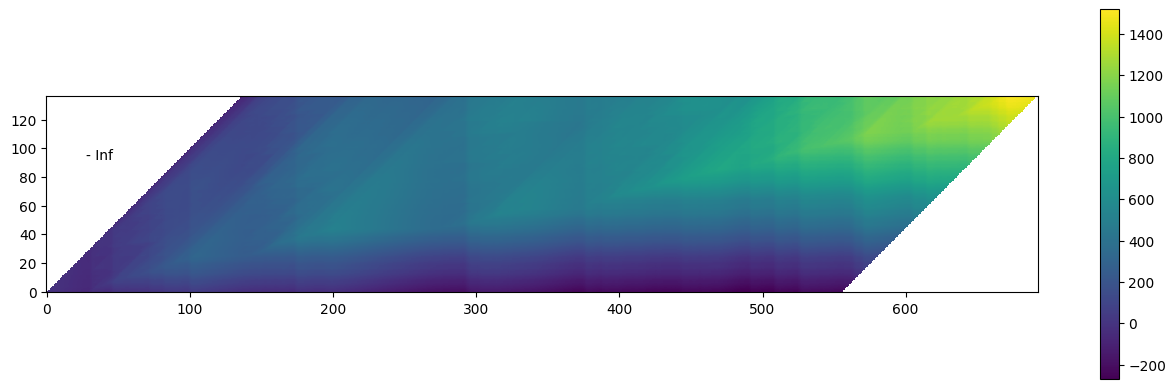

In [36]:
plt.imshow(trellis[1:, 1:].T, origin="lower")
plt.annotate("- Inf", (trellis.size(1) / 5, trellis.size(1) / 1.5))
plt.colorbar()
plt.show()

In [37]:
from dataclasses import dataclass
@dataclass
class Point:
    token_index: int
    time_index: int
    score: float


def backtrack(trellis, emission, tokens, blank_id=0):
    # Note:
    # j and t are indices for trellis, which has extra dimensions
    # for time and tokens at the beginning.
    # When referring to time frame index `T` in trellis,
    # the corresponding index in emission is `T-1`.
    # Similarly, when referring to token index `J` in trellis,
    # the corresponding index in transcript is `J-1`.
    j = trellis.size(1) - 1
    t_start = torch.argmax(trellis[:, j]).item()

    path = []
    for t in range(t_start, 0, -1):
        # 1. Figure out if the current position was stay or change
        # Note (again):
        # `emission[J-1]` is the emission at time frame `J` of trellis dimension.
        # Score for token staying the same from time frame J-1 to T.
        stayed = trellis[t - 1, j] + emission[t - 1, blank_id]
        # Score for token changing from C-1 at T-1 to J at T.
        changed = trellis[t - 1, j - 1] + emission[t - 1, tokens[j - 1]]

        # 2. Store the path with frame-wise probability.
        prob = emission[t - 1, tokens[j - 1] if changed > stayed else 0].exp().item()
        # Return token index and time index in non-trellis coordinate.
        path.append(Point(j - 1, t - 1, prob))

        # 3. Update the token
        if changed > stayed:
            j -= 1
            if j == 0:
                break
    else:
        raise ValueError("Failed to align")
    return path[::-1]


path = backtrack(trellis, emission, tokens)
for p in path:
    print(p)

Point(token_index=0, time_index=30, score=1401915.25)
Point(token_index=1, time_index=31, score=1734877.625)
Point(token_index=1, time_index=32, score=782810.0625)
Point(token_index=2, time_index=33, score=1658866.0)
Point(token_index=2, time_index=34, score=0.16720826923847198)
Point(token_index=3, time_index=35, score=3176821.25)
Point(token_index=3, time_index=36, score=0.3296951949596405)
Point(token_index=3, time_index=37, score=0.4151290953159332)
Point(token_index=3, time_index=38, score=0.0423428937792778)
Point(token_index=4, time_index=39, score=1838978.375)
Point(token_index=4, time_index=40, score=0.08705028146505356)
Point(token_index=4, time_index=41, score=0.27603641152381897)
Point(token_index=5, time_index=42, score=1083437.0)
Point(token_index=5, time_index=43, score=0.45082345604896545)
Point(token_index=6, time_index=44, score=3204450.0)
Point(token_index=7, time_index=45, score=3035.2216796875)
Point(token_index=7, time_index=46, score=2184690.75)
Point(token_index

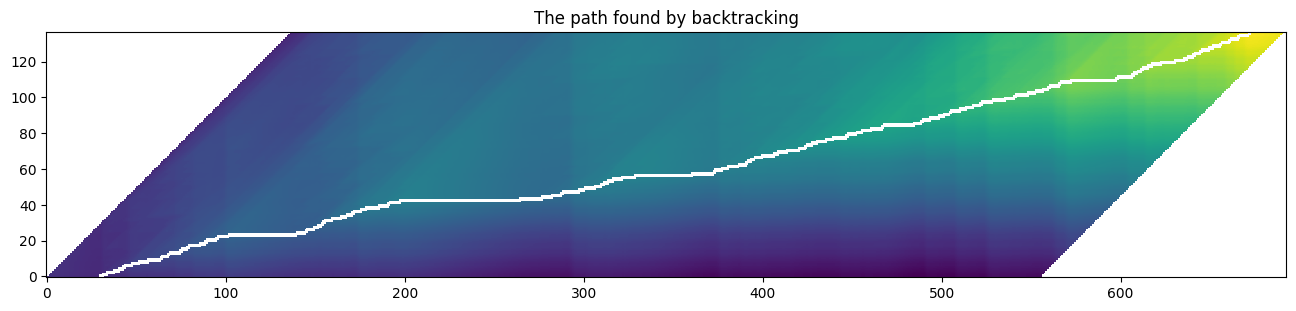

In [38]:
def plot_trellis_with_path(trellis, path):
    # To plot trellis with path, we take advantage of 'nan' value
    trellis_with_path = trellis.clone()
    for _, p in enumerate(path):
        trellis_with_path[p.time_index, p.token_index] = float("nan")
    plt.imshow(trellis_with_path[1:, 1:].T, origin="lower")


plot_trellis_with_path(trellis, path)
plt.title("The path found by backtracking")
plt.show()

In [39]:
# Merge the labels
@dataclass
class Segment:
    label: str
    start: int
    end: int
    score: float

    def __repr__(self):
        return f"{self.label}\t({self.score:4.2f}): [{self.start:5d}, {self.end:5d})"

    @property
    def length(self):
        return self.end - self.start


def merge_repeats(path):
    i1, i2 = 0, 0
    segments = []
    while i1 < len(path):
        while i2 < len(path) and path[i1].token_index == path[i2].token_index:
            i2 += 1
        score = sum(path[k].score for k in range(i1, i2)) / (i2 - i1)
        segments.append(
            Segment(
                transcript[path[i1].token_index],
                path[i1].time_index,
                path[i2 - 1].time_index + 1,
                score,
            )
        )
        i1 = i2
    return segments


segments = merge_repeats(path)

# delete segments with key "|"
segments = [seg for seg in segments if seg.label != "|"]

for seg in segments:
    print(seg)


b	(1401915.25): [   30,    31)
ə	(1258843.84): [   31,    33)
t	(829433.08): [   33,    35)
æ	(612992.91): [   39,    42)
f	(541718.73): [   42,    44)
t	(3204450.00): [   44,    45)
ə	(677875.56): [   45,    49)
r	(1544254.56): [   49,    53)
ɔ	(572728.64): [   58,    65)
l	(3603248.25): [   65,    66)
ð	(659742.44): [   69,    70)
ə	(6080.58): [   70,    76)
t	(99753.08): [   76,    77)
k	(9462.74): [   80,    81)
ə	(1711.21): [   81,    87)
m	(46114.77): [   87,    90)
o	(515845.97): [   90,    91)
ʊ	(526540.71): [   91,    96)
ʃ	(152191.47): [   96,    97)
ə	(263331.46): [   97,   103)
n	(38835.47): [  103,   141)
w	(3928088.00): [  146,   147)
ɑ	(46709.21): [  147,   151)
z	(1110638.91): [  151,   153)
ɪ	(766806.44): [  155,   156)
t	(2521833.25): [  156,   157)
ɔ	(808202.17): [  161,   166)
l	(1205734.42): [  166,   169)
w	(3569698.50): [  172,   173)
ə	(461021.79): [  173,   177)
r	(967131.73): [  177,   180)
θ	(111215.80): [  180,   187)
w	(732881.85): [  187,   192)
a	(1227211

In [40]:
import IPython

def display_segment(segments,i):
    ratio = waveform.size / (trellis.size(0) - 1)
    phoneme = segments[i]
    x0 = int(ratio * phoneme.start)
    x1 = int(ratio * phoneme.end)
    print(f"{phoneme.label} ({phoneme.score:.2f}): {x0 / sample_rate:.3f} - {x1 / sample_rate:.3f} sec")
    segment = waveform[x0:x1]
    return IPython.display.Audio(segment, rate=sample_rate)

In [41]:
print(transcript)
IPython.display.Audio(test_path)

bət|æftər|ɔl|ðət|kəmoʊʃən|wɑz|ɪt|ɔl|wərθwaɪl|æbsəlutli|yɛs|ðə|sɛt|dɪzaɪn|wɑz|brɛθtekɪŋ|ðə|æktərz|wər|ɪnkrɛdəbəl|ænd|ðə|sɔŋz|wər|mɛmərəbəl


In [42]:
display_segment(segments, 0)

b (1401915.25): 0.600 - 0.620 sec


In [43]:
display_segment(segments, 1)

ə (1258843.84): 0.620 - 0.660 sec


In [44]:
display_segment(segments, 2)

t (829433.08): 0.660 - 0.701 sec


In [45]:
display_segment(segments, 3)

æ (612992.91): 0.781 - 0.841 sec


In [46]:
display_segment(segments, 4)

f (541718.73): 0.841 - 0.881 sec


In [100]:
display_segment(segments, 5)

t (3204450.00): 0.881 - 0.901 sec


In [101]:
display_segment(segments, 6)

ə (677875.56): 0.901 - 0.981 sec


In [102]:
display_segment(segments, 7)

r (1544254.56): 0.981 - 1.061 sec


In [103]:
display_segment(segments, 8)

ɔ (572728.64): 1.161 - 1.301 sec


In [104]:
display_segment(segments, 9)

l (3603248.25): 1.301 - 1.321 sec


In [105]:
display_segment(segments, 10)

ð (659742.44): 1.381 - 1.401 sec


In [106]:
display_segment(segments, 11)

ə (6080.58): 1.401 - 1.521 sec


In [107]:
display_segment(segments, 12)

t (99753.08): 1.521 - 1.541 sec


In [108]:
display_segment(segments, 13)

k (9462.74): 1.601 - 1.621 sec


In [109]:
display_segment(segments, 14)

ə (1711.21): 1.621 - 1.741 sec


In [110]:
display_segment(segments, 15)

m (46114.77): 1.741 - 1.801 sec


In [111]:
display_segment(segments, 16)

o (515845.97): 1.801 - 1.821 sec


In [112]:
display_segment(segments, 17)

ʊ (526540.71): 1.821 - 1.921 sec


In [113]:
display_segment(segments, 18)

ʃ (152191.47): 1.921 - 1.942 sec


In [114]:
display_segment(segments, 19)

ə (263331.46): 1.942 - 2.062 sec
